In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import exp

In [171]:
from guess_query import GuessQueryProblem
from algebra import *
init_printing()

In [76]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
%autoreload

In [ ]:
standard_problem = GuessQueryProblem(discount_factor=0.99,
                             guess_correct_reward = 1,
                             guess_wrong_cost = 0,
                             query_cost = 0,
                             N = 1001,
                             convergence_tol = 10e-5)

In [ ]:
standard_problem.solve()

In [192]:
%autoreload

In [193]:
sol_of_m = value_function_solution_if_always_guess_after_query()

In [194]:
sol_of_delta_m = parameterize_in_terms_of_delta_m(sol)

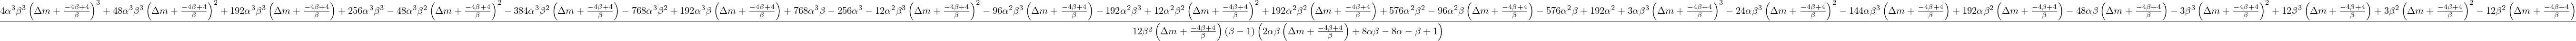

In [195]:
sol_of_delta_m

In [196]:
alpha_guess=0.3
analytic_sol_of_delta_m = sol_of_delta_m.subs(beta, 0.99).subs(alpha, alpha_guess)

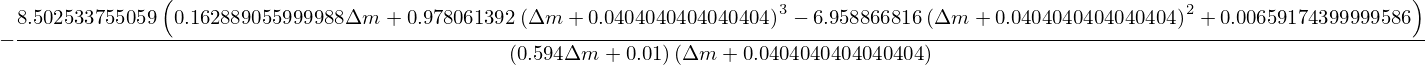

In [197]:
analytic_sol_of_delta_m

In [198]:
analytic_sol_of_m = sol_of_m.subs(beta, 0.99).subs(alpha, alpha_guess)

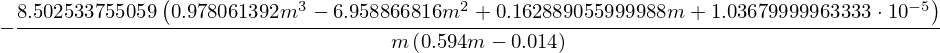

In [199]:
analytic_sol_of_m

In [200]:
def piecewiseify(solution):
    return Piecewise((always_guess_value(), m < m0(beta)), 
                                        (solution, m > m0(beta))).subs(beta, 0.99)

In [201]:
analytic_sol_of_m_piecewise = piecewiseify(analytic_sol_of_m)

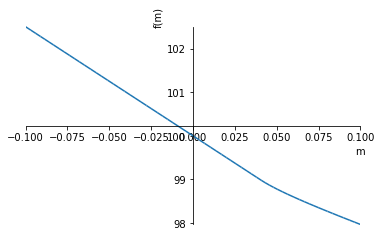

In [202]:
plot(analytic_sol_of_m_piecewise, (m, -0.1, 0.1))

<string>:2: RuntimeWarning: divide by zero encountered in true_divide


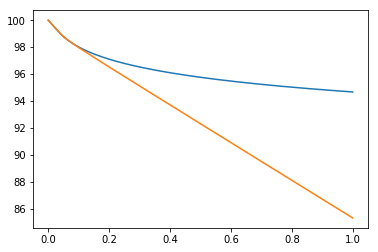

In [203]:
analytic_sol_of_m_piecewise_lambdified = lambdify(m, analytic_sol_of_m_piecewise)

region = slice(0, -1)

standard_problem.plot(standard_problem.expected_value_function, region)

plt.plot(standard_problem.discretization[region],
         analytic_sol_of_m_piecewise_lambdified(standard_problem.discretization[region]))

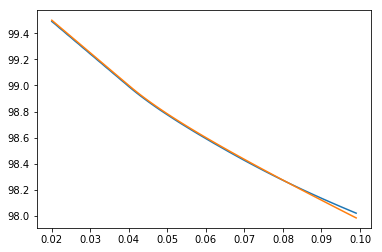

In [204]:
region = slice(20, 100)

standard_problem.plot(standard_problem.expected_value_function, region)

plt.plot(standard_problem.discretization[region],
         analytic_sol_of_m_piecewise_lambdified(standard_problem.discretization[region]))

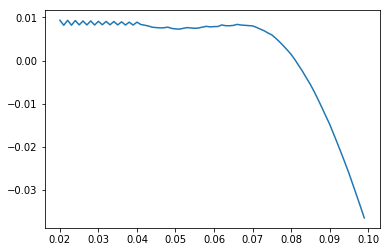

In [205]:
plt.plot(standard_problem.discretization[region],
         analytic_sol_of_m_piecewise_lambdified(standard_problem.discretization[region]) - \
         standard_problem.expected_value_function[region])

In [206]:
# That actually is kinda cool--it agrees pretty well, up to about 2*m_0, as we'd expect, since there the "pieces" are
# larger than m_0

In [207]:
# Next step: iterated integral to see if we can extend the agreement

In [208]:
iterated_solutions = [analytic_sol_of_m_piecewise]
for i in range(1):
    next_solution = value_function_solution_with_known_values_after_query(lambda namespace: iterated_solutions[i])
    iterated_solutions.append(next_solution)

TypeError: 
Expecting Boolean or bool but got `Rational`

In [ ]:
# Are you serious??? Am I going to have to do numerical integration here? :/
# This is depressing...
# Hmm, I think I see what's going on here. 